<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project_2--Bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

**Project Type**    - Regression

**Contribution**    - Individual

**Index:**

1. Problem statement
2. Importing libraries and the dataset
3. Understand the data
4. Data cleaning and basic feature engineering
5. Exploratory data analysis
6. Feature engineering
7. Data preprocessing
8. ML model implementation
9. XG boost model explainability with SHAP plots
10. Results
11. Summary and conclusions
12. References

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Capstone -2/SeoulBikeData.csv'

bike_df = pd.read_csv(path,encoding='unicode_escape')

In [ ]:
# First 5 rows of the dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# shape of the dataset
bike_df.shape

(8760, 14)

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## <b> 3.1. Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b> Preprocessing the data

In [ ]:
# checking duplicates
len(bike_df[bike_df.duplicated()])

0

In [ ]:
# checking null values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# converting date column dtype object to date 
bike_df['Date']=pd.to_datetime(bike_df['Date'])

In [ ]:
# Days between which the data is collected
print('Start date: ',bike_df['Date'].min())
print('End date: ',bike_df['Date'].max())

Start date:  2017-01-12 00:00:00
End date:  2018-12-11 00:00:00


* **The dataset is from a rental bike company based out of Seoul. The goal of this project is to develop a machine learning model that can predict the demand for rental bikes.**
* **The dataset contains the hourly weather conditions for a period of 364 days, and other details such as whether a said day was a holiday or not.**
* **The dataset containes a total of 8870 records and 14 attributes. There are no duplicate records or missing values in the dataset.**

# **4. Data cleaning and basic feature engineering:**

In [ ]:
bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

## **4.3. Engineering new features 'month' and 'day_of_week' from the 'date':**

In [ ]:
bike_df['month']= bike_df['date'].dt.month
bike_df['day_of_week']= bike_df['date'].dt.dayofweek

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

## **4.4. Engineering new feature 'weekend':**

* In a city, it is highly likely that the rental bike demand may follow different pattern over the weekends when people do not generally go to work.
* To capture this trend, we can define a new feature 'weekend' which indicates whether a said day is a weekend (1) or not (0).

In [ ]:
# engineering new feature 'weekend' from day_of_week
bike_df['weekend'] = bike_df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

# **5. Exploratory Data Analysis:**

In [ ]:
# summary of numerical columns
bike_df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month,day_of_week,weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,3.021918,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,1.999994,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,3.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,5.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,6.000000,1.000000


## **5.1. Analyzing the distribution of the dependent variable:**

In [ ]:
# defining dependent variable separately
dependent_variable = ['rented_bike_count']

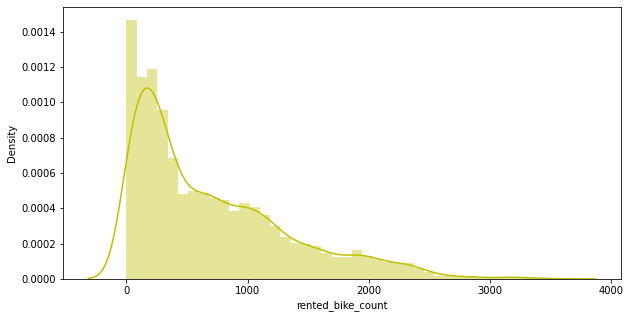

In [ ]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(bike_df['rented_bike_count'],color="y") 

In [ ]:
#skew of the dependant varaible
bike_df[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

* **The dependent variable is positively skewed. To get better predictions, it is ideal if the dependent variable is almost normally distributed.**
* **To achieve this, we can transform the data by log, sqrt, etc.**

### **5.1.1. Log transformation:**

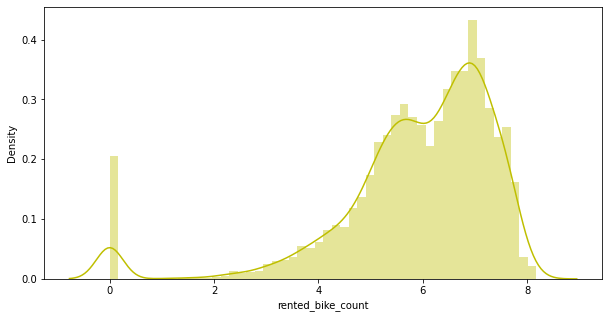

In [ ]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(bike_df['rented_bike_count']),color="y") 

In [ ]:
# skew of the dependent variable after log transformation
np.log1p(bike_df[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

### **5.1.2. Square-root transformation:**

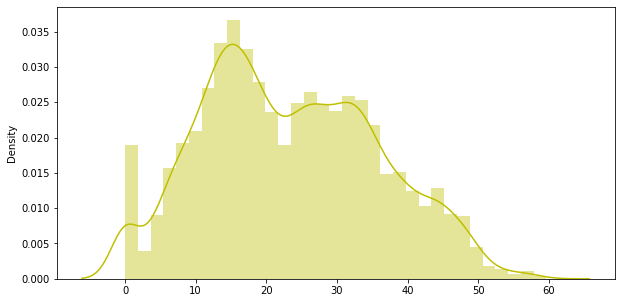

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(bike_df[dependent_variable]),color="y")

In [ ]:
# skew of the dependent variable after sqrt transformation
np.sqrt(bike_df[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

**We were able to reduce skewness on square root transformation. Hence we can use square root transformation during the modelling.**

In [ ]:
numeric_features = bike_df.describe().columns[1:]
numeric_features

Index(['hour', 'temperature', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'month',
       'day_of_week', 'weekend'],
      dtype='object')

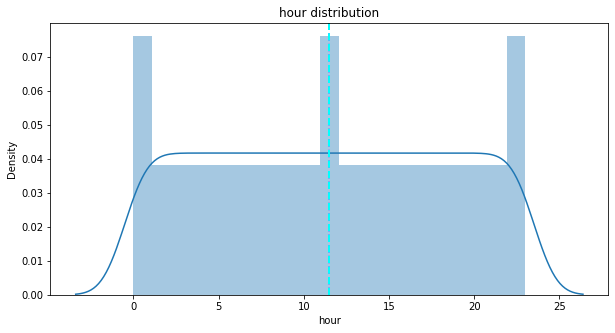

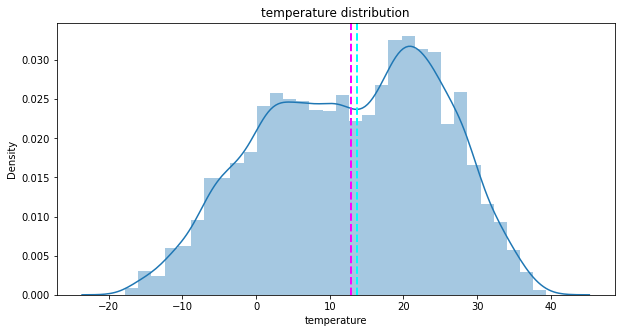

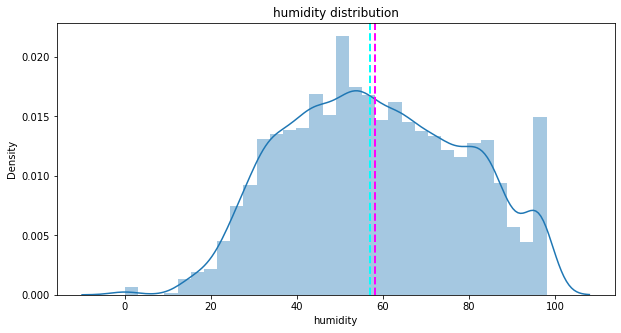

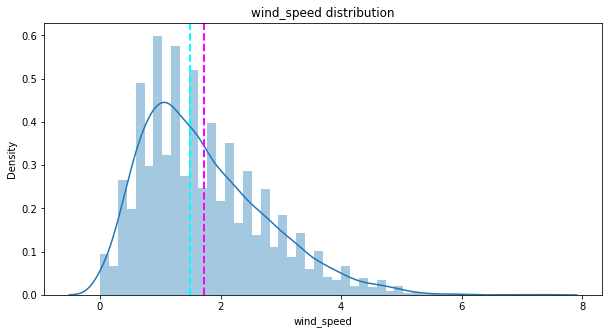

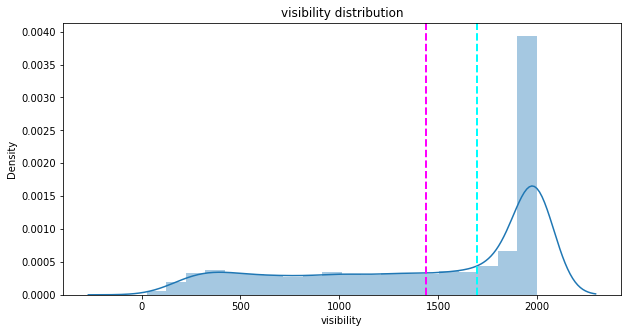

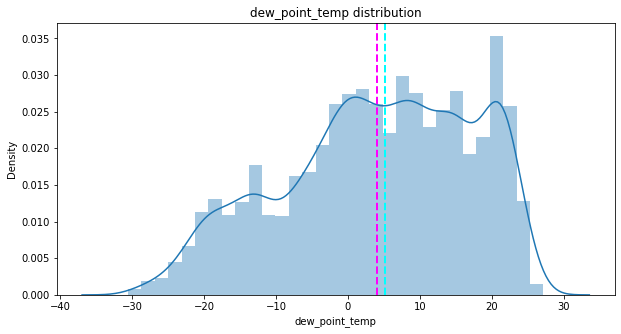

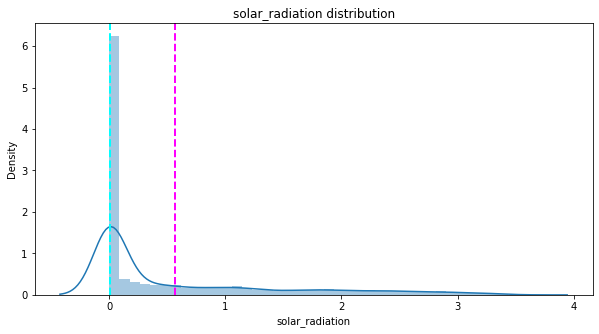

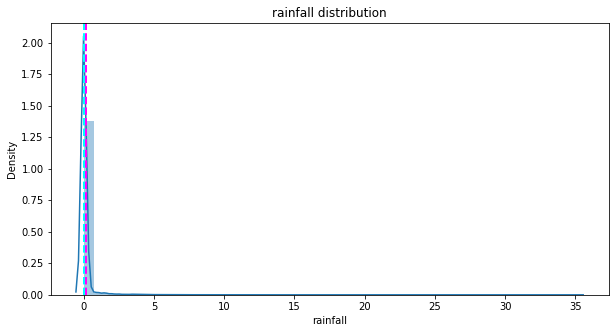

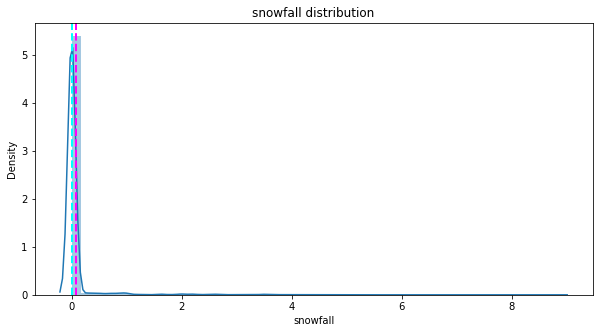

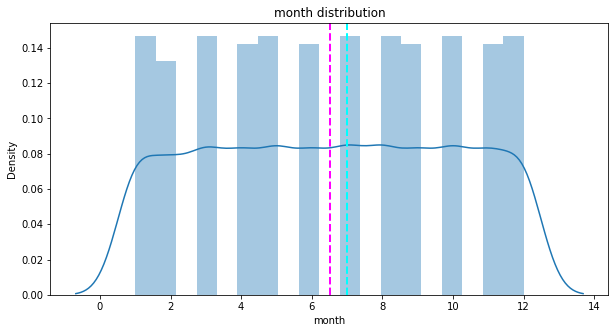

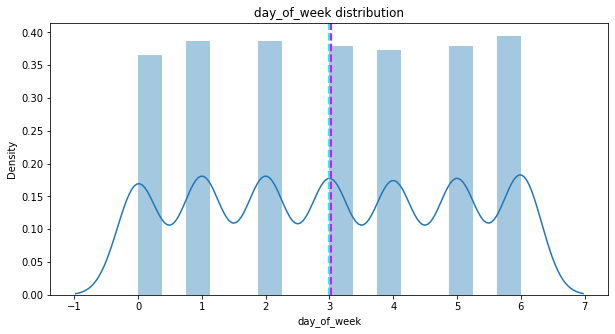

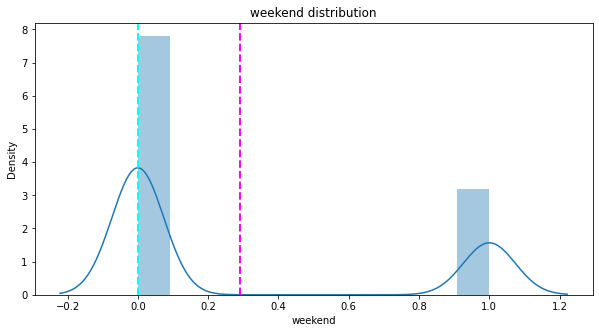

In [ ]:
# Analyzing the distribution of the continuous independent variables
for col in numeric_features:
  plt.figure(figsize=(10,5))
  sns.distplot(bike_df[col])
  plt.axvline(bike_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Summary:**

* **Normally distributed attributes: temperature, humidity,Dew point temperature(°C).**
* **Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.**
* **Negatively skewed attributes: visibility.**
* **Here weekend, day_of_week, month,snowfall,rainfall and hour is a categorical variable. So we will separate those variables.**

In [ ]:
#Updating the numeric features
numeric_features= ['rented_bike_count','temperature', 'humidity', 'wind_speed', 'visibility','dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall']

## **5.3. Analyzing the correlation amoung numeric features:**

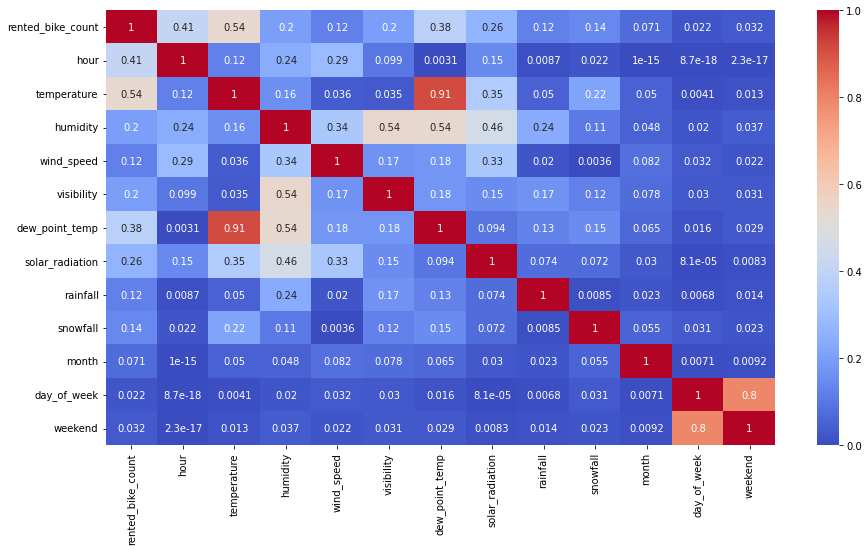

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is high correlation between temperature and dew_point_temp and between day_of_week and weekend.

In [ ]:
# dropping dew point temperature
bike_df.drop('dew_point_temp', axis=1,inplace=True)

In [ ]:
numerical_features= ['temperature', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall']

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. 

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_df[[i for i in numerical_features]])

,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radiation,2.246238
5,rainfall,1.078501
6,snowfall,1.118901


**There is no multicollinerity in the data.**

## **5.4. Analyzing the relationship between dependent variable and categorical independent variables:**

In [ ]:
# defining categorical independent variables separately
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

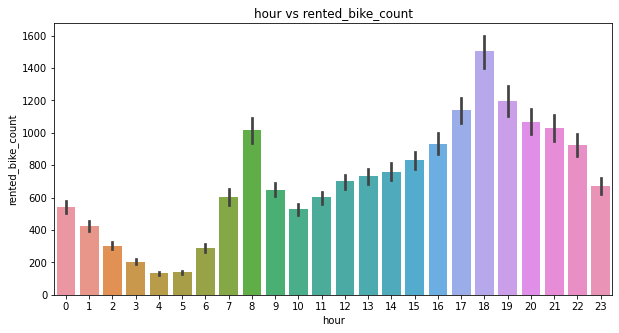

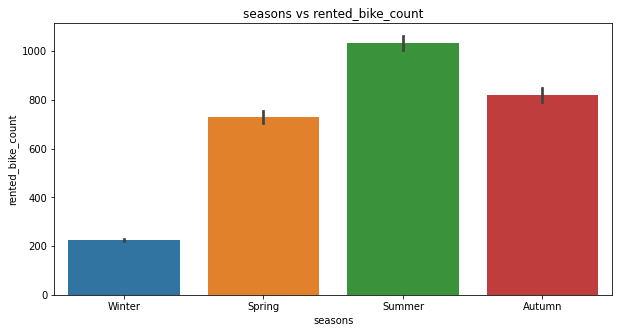

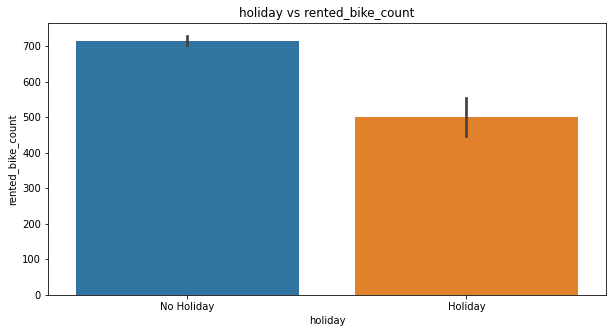

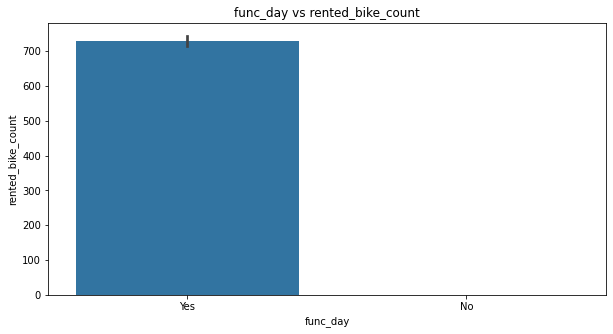

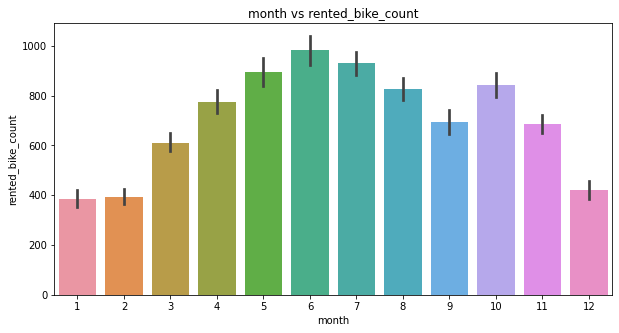

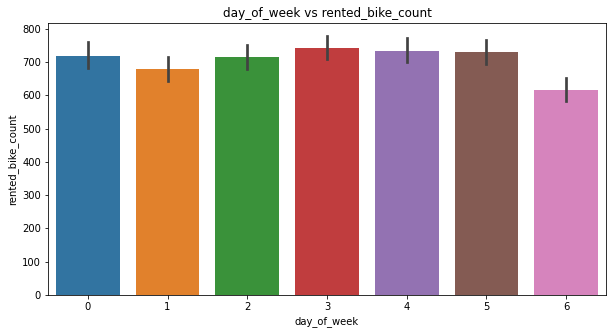

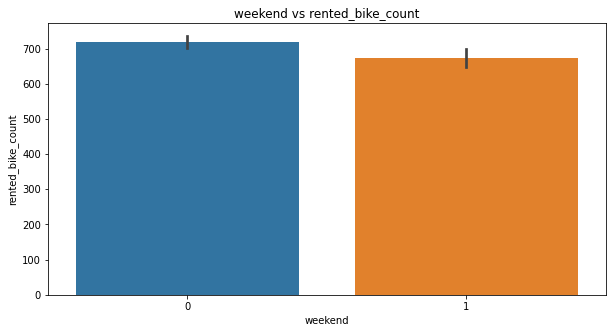

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_var:
    plt.figure(figsize=(10,5))
    sns.barplot(data=bike_df, x=i, y=dependent_variable[0])
    plt.xlabel(i)
    plt.ylabel(dependent_variable[0])
    plt.title(i+' vs '+ dependent_variable[0])


**Summary:**

* **The number of bikes rented is higher during the rush hours.**
* **The rented bike counts is higher during the summer and lowest during the winter.**
* **The rented bike count is higher on working days than on non working days.**
* **On a non functioning day, no bikes are rented in all the instances of the data.**
* **The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday.**
* **The rented bike counts is slightly lower on weenends than on weekdays.**

**Summary:** check once

* **In winters the overall demand for rented bikes is comparitively lower than that of other seasons.**
* **On a non functioning day, no bikes are rented.**
* **The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons**

## **5.6. Outlier analysis:**

# **6. Feature engineering:**

In [ ]:
# features
bike_df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall',
       'seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend'],
      dtype='object')

##**6.1. Converting snowfall, rainfall and visibility to categorical attributes:**

* Since there are vaey few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

In [ ]:
# Converting snowfall and rainfall to categorical attributes
bike_df['snowfall'] = bike_df['snowfall'].apply(lambda x: 1 if x>0 else 0)
bike_df['rainfall'] = bike_df['rainfall'].apply(lambda x: 1 if x>0 else 0)

**Converting visibility to a categorical attribute:**

When
* Visibility >= 20 Km ---> Clear (high visibility)
* 4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
* Visibility < 4 Km ---> Fog (low visibility)

In [ ]:
# encoding the visibility column
bike_df['visibility'] = pd.cut(bike_df.visibility,bins=[0,399,999,2001],labels=[0,1,2])

In [ ]:
# encoding
bike_df['func_day'] = np.where(bike_df['func_day'] == 'Yes',1,0)
bike_df['holiday'] = np.where(bike_df['holiday'] == 'Holiday', 1,0)

## **6.2. One-hot encoding:**

* Nominal categorical features 'month', 'day_of_week', 'hour' are nominal categorical variables. Hence we need to encode them.

In [ ]:
bike_df= pd.get_dummies(bike_df,columns = ['month', 'hour','day_of_week'])

In [ ]:
# dropping seasons,date and weekend
bike_df.drop(['seasons','weekend','date'],axis=1, inplace=True)

In [ ]:
bike_df.head()

,rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,254,-5.2,37,2.2,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,204,-5.5,38,0.8,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,173,-6.0,39,1.0,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,107,-6.2,40,0.9,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,78,-6.0,36,2.3,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
bike_df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'func_day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [ ]:
#defining final features
features = numerical_features.copy()
features.extend(['holiday','func_day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'])

In [ ]:
len(features)

52

In [ ]:
# Defining dependent and independent variables
X = bike_df[features]
y = np.sqrt(bike_df[dependent_variable])

Spliting the data set

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# **8. ML Model Implementation:**

## **8.1. Linear regression model:**

In [ ]:
# FittingLinear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_train,y_train)

0.7730491090762814

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(np.square(y_test), np.square(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(y_pred))     # As we are predicating log of the price
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 115331.92769762663
RMSE : 339.60554721268414
R2 : 0.7244308171667426
Adjusted R2 :  0.7159966809058071


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: DECISION TREE')

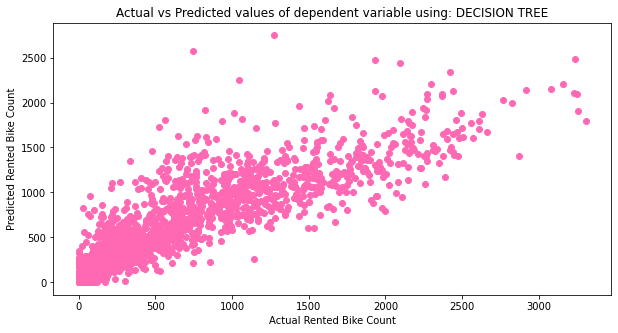

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
# plt.scatter(x=np.square(y_test),y=np.square(y_pred))
plt.scatter(x=np.square(y_test),y=np.square(y_pred),color = 'hotpink')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: DECISION TREE')

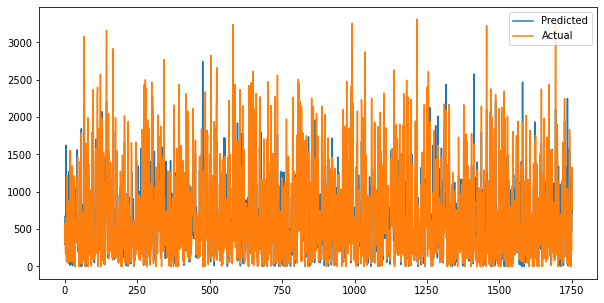

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.square(y_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.2. Lasso regression model:**

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'The best fit alpha value is found to be :{lasso_regressor.best_params_}')
print(f'The negative mean squared error using {lasso_regressor.best_params_} is {lasso_regressor.best_score_}')

The best fit alpha value is found to be :{'alpha': 0.0001}
The negative mean squared error using {'alpha': 0.0001} is -35.68329642370556


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(np.square(y_test), np.square(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(y_pred_lasso))    
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 115351.65761721067
RMSE : 339.63459425861004
R2 : 0.7243836753394474
Adjusted R2 :  0.7159480962444805


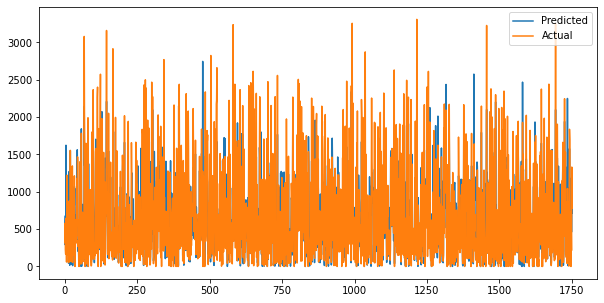

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.square(y_pred_lasso))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.3. Ridge regression model:**

In [ ]:
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'The best fit alpha value is found to be :{ridge_regressor.best_params_}')
print(f'The negative mean squared error using {ridge_regressor.best_params_} is {ridge_regressor.best_score_}')

The best fit alpha value is found to be :{'alpha': 1}
The negative mean squared error using {'alpha': 1} is -35.706044191232486


In [ ]:
y_pred_ridge= ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(np.square(y_test), np.square(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(y_pred_ridge))    
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 115523.47828733046
RMSE : 339.88744944073835
R2 : 0.7239731343678015
Adjusted R2 :  0.715524990157752


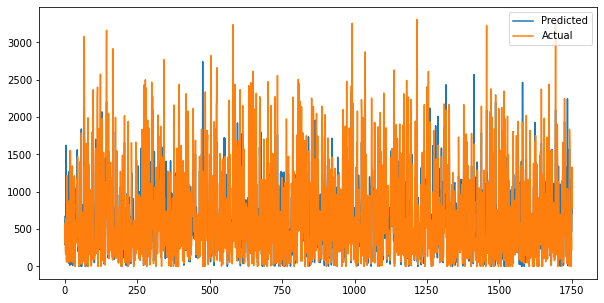

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.square(y_pred_ridge))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.3. Decision tree:**

In [ ]:
# Using gridsearchcv to find the hyperparameters with best predictions
decisionTree = DecisionTreeRegressor(random_state=0)
parameters = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [ ]:
dt_regressor= GridSearchCV(decisionTree, parameters, scoring='neg_mean_squared_error', cv=6)
dt_regressor.fit(X_train,y_train)


GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([20, 21, 22, 23, 24, 25]),
                         'min_samples_leaf': array([30, 32, 34, 36, 38, 40])},
             scoring='neg_mean_squared_error')

In [ ]:
# model best parameters
print(f'The best fit is found to be {dt_regressor.best_params_}')

The best fit is found to be {'max_depth': 25, 'min_samples_leaf': 30}


In [ ]:
# building Dicision tree model with best parameters
ypred_dt= dt_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(np.square(y_test), np.square(ypred_dt))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(ypred_dt))    
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(ypred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 92606.98914274057
RMSE : 304.3139647514398
R2 : 0.7787288148896646
Adjusted R2 :  0.7719565361223089


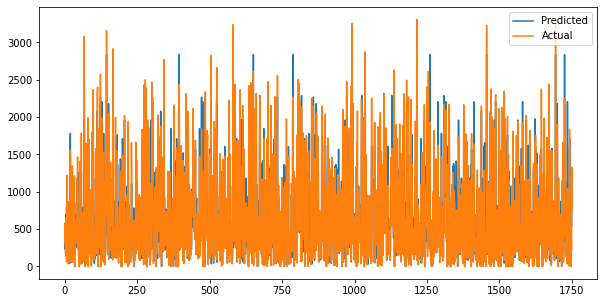

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.square(ypred_dt))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.2. Random Forests:**

In [ ]:
# random forest model
randomForest = RandomForestRegressor(random_state=0)
parameters = {'n_estimators':[500],
              'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [ ]:
rf_regressor= GridSearchCV(randomForest, parameters, scoring='neg_mean_squared_error', cv=6)
rf_regressor.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
# model best parameters
print(f'The best fit is found to be {rf_regressor.best_params_}')

The best fit is found to be {'max_depth': 25, 'min_samples_leaf': 30, 'n_estimators': 100}


In [ ]:
#predicting the y value
rf_y_pred= dt_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(np.square(y_test), np.square(rf_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(rf_y_pred))    
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(rf_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 92606.98914274057
RMSE : 304.3139647514398
R2 : 0.7787288148896646
Adjusted R2 :  0.7719565361223089


In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.square(rf_y_pred))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()